In [ ]:
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv('./datasert.csv')


In [2]:
# Apply filtering to smooth signals (moving average filter)
df['Ax_RA_smooth'] = df['Ax_RA']
df['Az_RA_smooth'] = df['Az_RA']
df['Gx_RA_smooth'] = df['Gx_RA']
df['Gz_RA_smooth'] = df['Gz_RA']

In [12]:
print(df[['Ax_RS','Ay_RS','Az_RS','Gx_RS','Gy_RS','Gz_RS','Ax_RA','Ay_RA','Az_RA','Gx_RA','Gy_RA','Gz_RA','Ax_RT','Ay_RT','Az_RT','Gx_RT','Gy_RT','Gz_RT','Ax_LT','Ay_LT','Az_LT','Gx_LT','Gy_LT','Gz_LT','Ax_LA','Ay_LA','Az_LA','Gx_LA','Gy_LA','Gz_LA','Ax_LS','Ay_LS','Az_LS','Gx_LS','Gy_LS','Gz_LS'
]].describe())


             Ax_RS        Ay_RS        Az_RS        Gx_RS        Gy_RS  \
count  6347.000000  6347.000000  6347.000000  6347.000000  6347.000000   
mean      0.012855    -0.010852     1.022817     2.429104    -4.458588   
std       0.143517     0.226622     0.170425    30.293893    17.679476   
min      -1.190000    -2.000000    -0.910000  -239.550000   -80.680000   
25%      -0.030000    -0.130000     0.920000    -6.810000   -14.785000   
50%       0.000000    -0.020000     1.050000     6.310000    -0.960000   
75%       0.060000     0.100000     1.130000    17.160000     7.805000   
max       1.030000     0.690000     1.630000    99.200000    37.990000   

             Gz_RS        Ax_RA        Ay_RA        Az_RA        Gx_RA  ...  \
count  6347.000000  6346.000000  6346.000000  6346.000000  6346.000000  ...   
mean     -2.669363    -0.026007     0.017899     0.963229     1.946009  ...   
std      79.617945     0.199273     0.271708     0.150261    32.673842  ...   
min    -236.35000

In [4]:
# Refined Gait Event Detection
gait_labels = []

for i in range(len(df)):
    ax = df['Ax_RA_smooth'].iloc[i]
    az = df['Az_RA_smooth'].iloc[i]
    gx = df['Gx_RA_smooth'].iloc[i]
    gz = df['Gz_RA_smooth'].iloc[i]

    # Heel Strike: Sharp vertical deceleration and gyroscope peak
    if az < 0.8 and gz > 50:  # Adjusted from -0.5 and 100
        gait_labels.append('Heel_Strike')
    
    # Toe-Off: Strong forward acceleration, stable gyroscope
    elif ax > 0.3 and gx < 20:  # Adjusted from 0.5 and 50
        gait_labels.append('Toe_Off')
    
    # Swing Phase: Moderate acceleration, low gyroscope
    elif ax > 0.1 and abs(gx) < 15:  # Adjusted from 0.2 and 30
        gait_labels.append('Swing')
    
    # Stance Phase: Low movement in both acceleration and gyroscope
    else:
        gait_labels.append('Stance')


In [5]:
# Add labels to dataset
df['Gait_Phase'] = gait_labels

# Check label distribution
print(df['Gait_Phase'].value_counts())


Gait_Phase
Stance     6131
Toe_Off     116
Swing       100
Name: count, dtype: int64


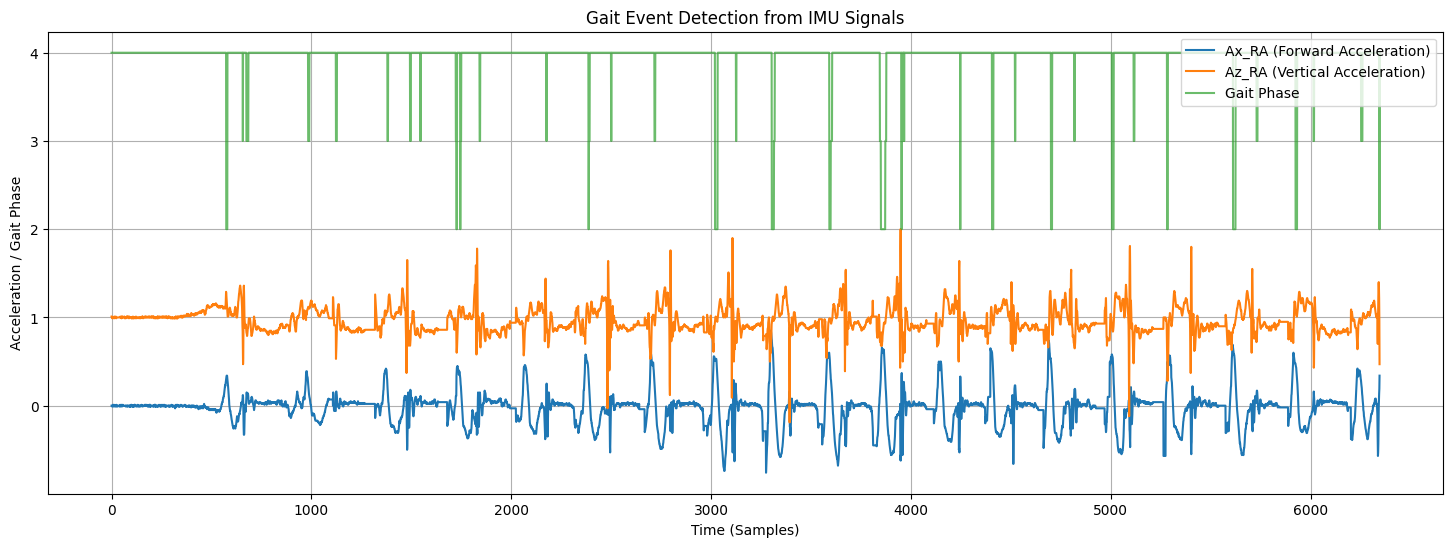

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(df['Ax_RA_smooth'], label='Ax_RA (Forward Acceleration)')
plt.plot(df['Az_RA_smooth'], label='Az_RA (Vertical Acceleration)')
plt.plot(df['Gait_Phase'].map({'Heel_Strike': 1, 'Toe_Off': 2, 'Swing': 3, 'Stance': 4}), label='Gait Phase', alpha=0.7)
plt.legend(loc='upper right')
plt.title('Gait Event Detection from IMU Signals')
plt.xlabel('Time (Samples)')
plt.ylabel('Acceleration / Gait Phase')
plt.grid(True)
plt.show()


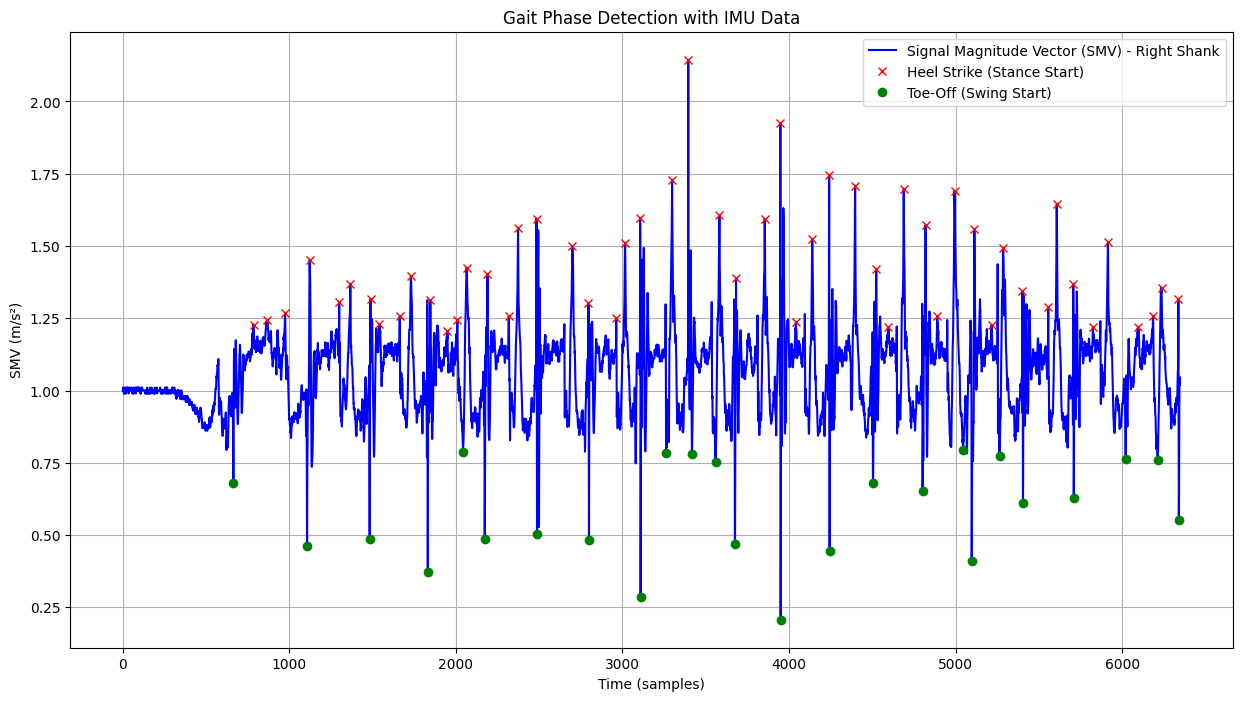

Detected 52 stance phases and 25 swing phases.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Load dataset
df = pd.read_csv("./datasert.csv")  # Replace with your dataset path

# Calculate Signal Magnitude Vector (SMV) for right shank
smv_rs = np.sqrt(df['Ax_RS']**2 + df['Ay_RS']**2 + df['Az_RS']**2)

# Identify peaks for heel strike (stance phase)
peaks, _ = find_peaks(smv_rs, height=1.2, distance=50)

# Identify valleys for toe-off (swing phase)
valleys, _ = find_peaks(-smv_rs, height=-0.8, distance=50)

# Ensure equal lengths for phase mapping
# min_length = min(len(peaks), len(valleys))
# peaks = peaks[:min_length]
# valleys = valleys[:min_length]

# Plotting gait cycle
plt.figure(figsize=(15, 8))
plt.plot(smv_rs, label='Signal Magnitude Vector (SMV) - Right Shank', color='b')
plt.plot(peaks, smv_rs[peaks], "rx", label='Heel Strike (Stance Start)')
plt.plot(valleys, smv_rs[valleys], "go", label='Toe-Off (Swing Start)')

# # Highlight gait phases
# for i in range(min_length - 1):
#     plt.axvspan(peaks[i], valleys[i], color='lightcoral', alpha=0.4, label='Stance Phase' if i == 0 else "")
#     plt.axvspan(valleys[i], peaks[i + 1], color='lightgreen', alpha=0.4, label='Swing Phase' if i == 0 else "")

plt.xlabel('Time (samples)')
plt.ylabel('SMV (m/s²)')
plt.legend(loc='upper right')
plt.title('Gait Phase Detection with IMU Data')
plt.grid(True)
plt.show()

# Summary of detected phases
print(f"Detected {len(peaks)} stance phases and {len(valleys)} swing phases.")


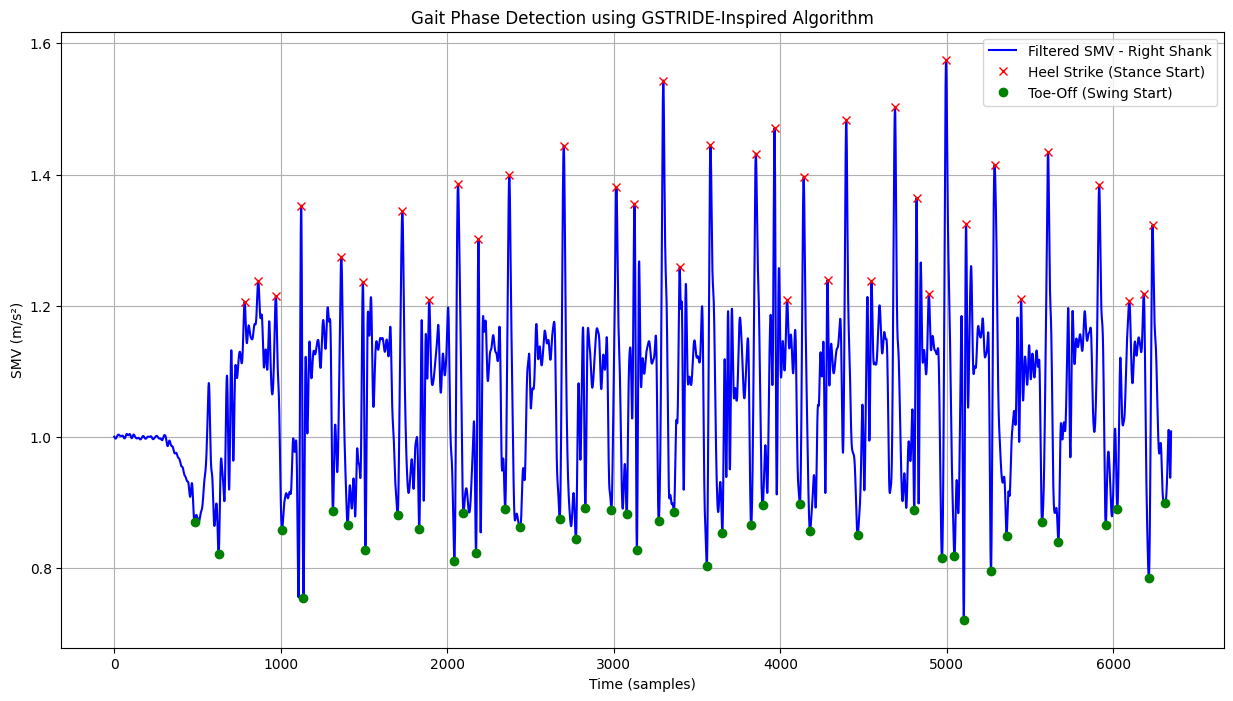

Detected 36 stance phases and 41 swing phases.
Phase 1: Stance from 783 to 482, Swing from 482 to 865
Phase 2: Stance from 865 to 627, Swing from 627 to 970
Phase 3: Stance from 970 to 1008, Swing from 1008 to 1122
Phase 4: Stance from 1122 to 1136, Swing from 1136 to 1364
Phase 5: Stance from 1364 to 1313, Swing from 1313 to 1493
Phase 6: Stance from 1493 to 1401, Swing from 1401 to 1730
Phase 7: Stance from 1730 to 1508, Swing from 1508 to 1891
Phase 8: Stance from 1891 to 1701, Swing from 1701 to 2064
Phase 9: Stance from 2064 to 1831, Swing from 1831 to 2187
Phase 10: Stance from 2187 to 2042, Swing from 2042 to 2372
Phase 11: Stance from 2372 to 2097, Swing from 2097 to 2699
Phase 12: Stance from 2699 to 2172, Swing from 2172 to 3015
Phase 13: Stance from 3015 to 2347, Swing from 2347 to 3124
Phase 14: Stance from 3124 to 2438, Swing from 2438 to 3297
Phase 15: Stance from 3297 to 2674, Swing from 2674 to 3395
Phase 16: Stance from 3395 to 2772, Swing from 2772 to 3580
Phase 17: S

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

# Load dataset
df = pd.read_csv("./datasert.csv")  # Replace with your dataset path

# Butterworth filter to smooth signals
def butter_lowpass_filter(data, cutoff=5, fs=100, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Calculate Signal Magnitude Vector (SMV) for right shank
smv_rs = np.sqrt(df['Ax_RS']**2 + df['Ay_RS']**2 + df['Az_RS']**2)
smv_rs_filtered = butter_lowpass_filter(smv_rs)

# Identify heel strike (stance phase start)
peaks, _ = find_peaks(smv_rs_filtered, height=1.2, distance=50)

# Identify toe-off (swing phase start)
valleys, _ = find_peaks(-smv_rs_filtered, height=-0.9, distance=50)

# GSTRIDE-inspired gait phase segmentation
def detect_gait_phases(smv, peaks, valleys):
    phases = []
    for i in range(min(len(peaks), len(valleys)) - 1):
        stance_start = peaks[i]
        swing_start = valleys[i]
        next_stance_start = peaks[i + 1]
        phases.append((stance_start, swing_start, next_stance_start))
    return phases

gait_phases = detect_gait_phases(smv_rs_filtered, peaks, valleys)

# Plotting gait cycle with phase segmentation
plt.figure(figsize=(15, 8))
plt.plot(smv_rs_filtered, label='Filtered SMV - Right Shank', color='b')
plt.plot(peaks, smv_rs_filtered[peaks], "rx", label='Heel Strike (Stance Start)')
plt.plot(valleys, smv_rs_filtered[valleys], "go", label='Toe-Off (Swing Start)')

plt.xlabel('Time (samples)')
plt.ylabel('SMV (m/s²)')
plt.legend(['Filtered SMV - Right Shank', 'Heel Strike (Stance Start)', 'Toe-Off (Swing Start)'])
plt.title('Gait Phase Detection using GSTRIDE-Inspired Algorithm')
plt.grid(True)
plt.show()

# Summary of detected phases
print(f"Detected {len(peaks)} stance phases and {len(valleys)} swing phases.")
for idx, (stance_start, swing_start, next_stance_start) in enumerate(gait_phases):
    print(f"Phase {idx+1}: Stance from {stance_start} to {swing_start}, Swing from {swing_start} to {next_stance_start}")


In [4]:
import numpy as np


class Gait_Parameters_Estimation:
    # e.g. How to use it in main script:
    # 1) Init object:       GPE = Gait_Parameters_Estimation(len(Step_events))
    #    With the positions of the steps detected previously, in the imu data array
    # 2) Pass IMU data, AHRS.angles and INS-ZUPT estimations:
    #    GPE.estimate(Phases,ZUPT.Speed_G_corr,ZUPT.deltasXYZ,ZUPT.XYZ,AHRS.angles[:,ori],timeStamps)
    #-----------------------------constructor----------------------
    def __init__(self, num_steps):
        self.PTO = np.zeros(num_steps)              # Toe Off Percentage (%)
        self.Pswing = np.zeros(num_steps)           # Swing Percentage (%)
        # Heel Strike Percentage (%)
        self.PHS = np.zeros(num_steps)
        self.PFF = np.zeros(num_steps)              # Foot Flat Percentage (%)
        self.tcycle = np.zeros(num_steps)           # Gate Cycle (s)
        self.TO = np.zeros(num_steps)               # Toe Off Angle (°)
        self.HS = np.zeros(num_steps)               # Heel Strike Angle (°)
        self.cadence = np.zeros(num_steps)          # Cadence  (steps/min)
        self.speed = np.zeros(num_steps)            # Speed (m/s)
        self.StrideLengths = np.zeros(num_steps)    # Stride Length (m)
        self.Path3Dlength = np.zeros(num_steps)     # Path 3D Length (m)
        self.Path2Dlength = np.zeros(num_steps)     # Path 2D Length (m)
        self.clearance = np.zeros(num_steps)        # Clearance (m)
        num_statistics = 29
        self.statistics = np.zeros(num_statistics)  # Statistics of parameters
        self.limit = 0.4
    #%================================Update======================================

    def estimate(self, Phases, Speed, deltasXYZ, XYZ, Pitch, Pitch0, timeStamps):

        # Phases=[num_steps,5]          Registered detection points of each gait phase (endFFprev,TO,HS,newFF,endFF)
        # Speed=[num_samples,3]         Speed corrected by ZUPT
        # deltasXYZ=[num_samples,3]     Deltas estimation by INS ZUPT
        # XYZ=[num_samples,3]           Deltas estimation by INS ZUPT
        # Pitch=[num_samples]           Pitch angle
        # timeStamps=[num_samples]      IMU time stamp data

        num_steps = Phases.shape[0]
        Speed_ZUPT = np.sqrt(Speed[:, 0]**2 + Speed[:, 1]**2 + Speed[:, 2]**2)
        deltas3d = np.sqrt(deltasXYZ[:, 0]**2 +
                           deltasXYZ[:, 1]**2 + deltasXYZ[:, 2]**2)
        deltas2d = np.sqrt(deltasXYZ[:, 0]**2 + deltasXYZ[:, 1]**2)
        for i in range(num_steps):
            self.tcycle[i] = timeStamps[int(
                Phases[i, 4])] - timeStamps[int(Phases[i, 0])]
            self.PTO[i] = (timeStamps[int(Phases[i, 1])] -
                           timeStamps[int(Phases[i, 0])]) * 100 / self.tcycle[i]
            self.Pswing[i] = (timeStamps[int(Phases[i, 2])] -
                              timeStamps[int(Phases[i, 1])]) * 100 / self.tcycle[i]
            self.PHS[i] = (timeStamps[int(Phases[i, 3])] -
                           timeStamps[int(Phases[i, 2])]) * 100 / self.tcycle[i]
            self.PFF[i] = (timeStamps[int(Phases[i, 4])] -
                           timeStamps[int(Phases[i, 3])]) * 100 / self.tcycle[i]
            self.TO[i] = -abs(Pitch0[i] - Pitch[int(Phases[i, 1])])
            self.HS[i] = abs(Pitch[int(Phases[i, 2])] - Pitch0[i])
            self.cadence[i] = 60 / (self.tcycle[i])
            self.speed[i] = np.mean(
                Speed_ZUPT[int(Phases[i, 0]):int(Phases[i, 4])])
            self.StrideLengths[i] = np.sqrt((XYZ[int(Phases[i, 4]), 0] - XYZ[int(
                Phases[i, 0]), 0])**2 + (XYZ[int(Phases[i, 4]), 1] - XYZ[int(Phases[i, 0]), 1])**2)
            self.Path3Dlength[i] = np.sum(
                deltas3d[int(Phases[i, 0]):int(Phases[i, 4])])
            self.Path2Dlength[i] = np.sum(
                deltas2d[int(Phases[i, 0]):int(Phases[i, 4])])
            maxi = XYZ[int(Phases[i, 0]), 2]
            mini = XYZ[int(Phases[i, 0]), 2]
            for j in range(int(Phases[i, 0]), int(Phases[i, 4])):
                if XYZ[j, 2] >= maxi:
                    maxi = XYZ[j, 2]
                if XYZ[j, 2] <= mini:
                    mini = XYZ[j, 2]
            self.clearance[i] = maxi - mini

        StrideLengths = self.trunc_array(self.StrideLengths)
        self.statistics[0] = "{0:.3f}".format(float(np.sum(StrideLengths)))
        tcycle = self.trunc_array(self.tcycle)
        self.statistics[1] = "{0:.3f}".format(float(np.sum(tcycle)))
        self.statistics[2] = "{0:.0f}".format(float(int(num_steps)))

        self.statistics[3] = "{0:.3f}".format(float(np.mean(tcycle)))
        self.statistics[4] = "{0:.3f}".format(float(np.std(tcycle)))

        PTO = self.trunc_array(self.PTO)
        self.statistics[5] = "{0:.2f}".format(float(np.mean(PTO)))
        self.statistics[6] = "{0:.2f}".format(float(np.std(PTO)))

        Pswing = self.trunc_array(self.Pswing)
        self.statistics[7] = "{0:.2f}".format(float(np.mean(Pswing)))
        self.statistics[8] = "{0:.2f}".format(float(np.std(Pswing)))

        PHS = self.trunc_array(self.PHS)
        self.statistics[9] = "{0:.2f}".format(float(np.mean(PHS)))
        self.statistics[10] = "{0:.2f}".format(float(np.std(PHS)))

        PFF = self.trunc_array(self.PFF)
        self.statistics[11] = "{0:.2f}".format(float(np.mean(PFF)))
        self.statistics[12] = "{0:.2f}".format(float(np.std(PFF)))

        TO = self.trunc_array(self.TO)
        self.statistics[13] = "{0:.3f}".format(float(np.mean(TO)))
        self.statistics[14] = "{0:.3f}".format(float(np.std(TO)))

        HS = self.trunc_array(self.HS)
        self.statistics[15] = "{0:.3f}".format(float(np.mean(HS)))
        self.statistics[16] = "{0:.3f}".format(float(np.std(HS)))

        cadence = self.trunc_array(self.cadence)
        self.statistics[17] = "{0:.3f}".format(float(np.mean(cadence)))
        self.statistics[18] = "{0:.3f}".format(float(np.std(cadence)))

        speed = self.trunc_array(self.speed)
        self.statistics[19] = "{0:.3f}".format(float(np.mean(speed)))
        self.statistics[20] = "{0:.3f}".format(float(np.std(speed)))

        self.statistics[21] = "{0:.3f}".format(float(np.mean(StrideLengths)))
        self.statistics[22] = "{0:.3f}".format(float(np.std(StrideLengths)))

        Path3Dlength = self.trunc_array(self.Path3Dlength)
        self.statistics[23] = "{0:.3f}".format(float(np.mean(Path3Dlength)))
        self.statistics[24] = "{0:.3f}".format(float(np.std(Path3Dlength)))

        Path2Dlength = self.trunc_array(self.Path2Dlength)
        self.statistics[25] = "{0:.3f}".format(float(np.mean(Path2Dlength)))
        self.statistics[26] = "{0:.3f}".format(float(np.std(Path2Dlength)))

        clearance = self.trunc_array(self.clearance)
        self.statistics[27] = "{0:.3f}".format(float(np.mean(clearance)))
        self.statistics[28] = "{0:.3f}".format(float(np.std(clearance)))

        # Change NaN values to mean of the vector, just for visualization of the parameters
        # not for obtaining the statistics, in statisticts we remove NaN values
        np.nan_to_num(self.tcycle, copy=False,
                      nan=self.statistics[3], posinf=self.statistics[3], neginf=self.statistics[3])
        np.nan_to_num(self.PTO, copy=False,
                      nan=self.statistics[5], posinf=self.statistics[5], neginf=self.statistics[5])
        np.nan_to_num(self.Pswing, copy=False,
                      nan=self.statistics[7], posinf=self.statistics[7], neginf=self.statistics[7])
        np.nan_to_num(self.PHS, copy=False,
                      nan=self.statistics[9], posinf=self.statistics[9], neginf=self.statistics[9])
        np.nan_to_num(self.PFF, copy=False,
                      nan=self.statistics[11], posinf=self.statistics[11], neginf=self.statistics[11])
        np.nan_to_num(self.TO, copy=False,
                      nan=self.statistics[13], posinf=self.statistics[13], neginf=self.statistics[13])
        np.nan_to_num(self.HS, copy=False,
                      nan=self.statistics[15], posinf=self.statistics[15], neginf=self.statistics[15])
        np.nan_to_num(self.cadence, copy=False,
                      nan=self.statistics[17], posinf=self.statistics[17], neginf=self.statistics[17])
        np.nan_to_num(self.speed, copy=False,
                      nan=self.statistics[19], posinf=self.statistics[19], neginf=self.statistics[19])
        np.nan_to_num(self.StrideLengths, copy=False,
                      nan=self.statistics[21], posinf=self.statistics[21], neginf=self.statistics[21])
        np.nan_to_num(self.Path3Dlength, copy=False,
                      nan=self.statistics[23], posinf=self.statistics[23], neginf=self.statistics[23])
        np.nan_to_num(self.Path2Dlength, copy=False,
                      nan=self.statistics[25], posinf=self.statistics[25], neginf=self.statistics[25])
        np.nan_to_num(self.clearance, copy=False,
                      nan=self.statistics[27], posinf=self.statistics[27], neginf=self.statistics[27])

    def trunc_array(self, arr):
        arr = arr[~np.isnan(arr)]
        median_arr = np.median(arr)
        limit_upper = median_arr * (1 + self.limit)
        limit_lower = median_arr * (self.limit)
        if median_arr > 0:
            idx = np.where((arr <= limit_upper) & (arr >= limit_lower))
        else:
            idx = np.where((arr >= limit_upper) & (arr <= limit_lower))
        arr = arr[idx]
        return arr


In [5]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks, butter, filtfilt

# Load dataset
df = pd.read_csv("./datasert.csv")  # Replace with your dataset path

# Butterworth filter to smooth signals
def butter_lowpass_filter(data, cutoff=5, fs=100, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Calculate Signal Magnitude Vector (SMV) for right shank
smv_rs = np.sqrt(df['Ax_RS']**2 + df['Ay_RS']**2 + df['Az_RS']**2)
smv_rs_filtered = butter_lowpass_filter(smv_rs)

# Identify heel strike (stance phase start)
peaks, _ = find_peaks(smv_rs_filtered, height=1.2, distance=50)

# Identify toe-off (swing phase start)
valleys, _ = find_peaks(-smv_rs_filtered, height=-0.8, distance=50)

# Gait phase labeling
labels = ['Stance', 'Swing', 'Stance']
def label_gait_phase(peaks, valleys, length):
    phase_labels = ['Unknown'] * length
    for i in range(len(peaks) - 1):
        stance_start = peaks[i]
        swing_start = valleys[i] if i < len(valleys) else peaks[i]
        next_stance_start = peaks[i + 1]

        phase_labels[stance_start:swing_start] = ['Stance'] * (swing_start - stance_start)
        phase_labels[swing_start:next_stance_start] = ['Swing'] * (next_stance_start - swing_start)
    return phase_labels

df['Gait_Phase'] = label_gait_phase(peaks, valleys, len(smv_rs_filtered))

# Save labeled dataset
df.to_csv("labeled_dataset.csv", index=False)

print("Gait phases labeled and dataset saved as 'labeled_dataset.csv'.")


Gait phases labeled and dataset saved as 'labeled_dataset.csv'.
